In [1]:
from statsmodels.tsa.api import ARDL
from statsmodels.tsa.ardl import ardl_select_order
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../data/deseasoned_diff.csv')
data.head()

,idx,trade_diff,fxres_diff,exrate_diff
0,1,-3479.635449,32086.381014,0.165112
1,2,-30979.491764,66728.047440,1.135469
2,3,4229.588744,59625.268454,0.574136
3,4,9630.165211,65695.118269,-0.389686
4,5,-9409.709256,6645.265046,0.161513


In [3]:
train_data = data[:100]
val_data = data[100:]

In [4]:
timestamps = pd.read_excel('../data/final-data-assgn3.xlsx')['Month']

In [5]:
optimal_order = ardl_select_order(train_data['trade_diff'], 4, train_data[['exrate_diff', 'fxres_diff']], 4, ic='aic')
optimal_order.model.ardl_order

(4, 0)

In [6]:
opt_model = optimal_order.model.fit()
opt_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARDL Model Results                              
==============================================================================
Dep. Variable:             trade_diff   No. Observations:                  100
Model:                     ARDL(4, 0)   Log Likelihood               -1085.915
Method:               Conditional MLE   S.D. of innovations          19784.942
Date:                Tue, 29 Apr 2025   AIC                           2185.830
Time:                        22:49:37   BIC                           2203.781
Sample:                             4   HQIC                          2193.086
                                  100                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1054.0304   2127.692     -0.495      0.622   -5281.062    3173.001
trade_diff.L1     -0.2850      0.103     -2.758      0.007      -0.490      -0.080
trade_diff.L2      0.0311      0.108      0.289      0.773      -0.183       0.245
trade_diff.L3      0.0520      0.109      0.479      0.633      -0.164       0.268
trade_diff.L4     -0.3367      0.104     -3.249      0.002      -0.543      -0.131
exrate_diff.L0 -2849.8813   2017.996     -1.412      0.161   -6858.982    1159.219
==================================================================================
"""

In [7]:
model = ARDL(train_data['trade_diff'], 4, train_data[['exrate_diff', 'fxres_diff']], 4).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARDL Model Results                              
==============================================================================
Dep. Variable:             trade_diff   No. Observations:                  100
Model:                  ARDL(4, 4, 4)   Log Likelihood               -1080.884
Method:               Conditional MLE   S.D. of innovations          18774.755
Date:                Tue, 29 Apr 2025   AIC                           2193.768
Time:                        22:49:37   BIC                           2234.797
Sample:                             4   HQIC                          2210.353
                                  100                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1380.4446   2981.296     -0.463      0.645   -7312.288    4551.399
trade_diff.L1     -0.3041      0.110     -2.774      0.007      -0.522      -0.086
trade_diff.L2     -0.0617      0.125     -0.494      0.623      -0.310       0.187
trade_diff.L3      0.0547      0.121      0.454      0.651      -0.185       0.295
trade_diff.L4     -0.3042      0.113     -2.702      0.008      -0.528      -0.080
exrate_diff.L0 -3416.4359   2175.003     -1.571      0.120   -7744.010     911.138
exrate_diff.L1  1276.2995   2151.880      0.593      0.555   -3005.266    5557.865
exrate_diff.L2  3110.2200   2121.380      1.466      0.146   -1110.661    7331.101
exrate_diff.L3  2148.7245   2189.378      0.981      0.329   -2207.451    6504.900
exrate_diff.L4  1756.6575   2185.245      0.804      0.424   -2591.295    6104.610
fxres_diff.L0      0.0313      0.034      0.908      0.366      -0.037       0.100
fxres_diff.L1     -0.0228      0.034     -0.675      0.501      -0.090       0.044
fxres_diff.L2     -0.0142      0.034     -0.413      0.680      -0.083       0.054
fxres_diff.L3      0.0273      0.035      0.784      0.435      -0.042       0.097
fxres_diff.L4     -0.0695      0.035     -2.007      0.048      -0.138      -0.001
==================================================================================
"""

In [8]:
model_4_0_4 = ARDL(train_data['trade_diff'], 4, train_data[['exrate_diff', 'fxres_diff']], {'exrate_diff':0, 'fxres_diff':4}).fit()
model_4_0_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARDL Model Results                              
==============================================================================
Dep. Variable:             trade_diff   No. Observations:                  100
Model:                  ARDL(4, 0, 4)   Log Likelihood               -1082.872
Method:               Conditional MLE   S.D. of innovations          19167.707
Date:                Tue, 29 Apr 2025   AIC                           2189.745
Time:                        22:49:37   BIC                           2220.517
Sample:                             4   HQIC                          2202.183
                                  100                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            606.0690   2757.901      0.220      0.827   -4877.377    6089.515
trade_diff.L1     -0.2709      0.106     -2.568      0.012      -0.481      -0.061
trade_diff.L2     -0.0289      0.117     -0.247      0.805      -0.262       0.204
trade_diff.L3      0.0657      0.115      0.573      0.568      -0.162       0.294
trade_diff.L4     -0.3357      0.109     -3.071      0.003      -0.553      -0.118
exrate_diff.L0 -3509.6516   2072.644     -1.693      0.094   -7630.623     611.320
fxres_diff.L0      0.0231      0.033      0.697      0.488      -0.043       0.089
fxres_diff.L1     -0.0232      0.032     -0.714      0.477      -0.088       0.041
fxres_diff.L2     -0.0080      0.033     -0.240      0.811      -0.075       0.058
fxres_diff.L3      0.0241      0.034      0.720      0.473      -0.043       0.091
fxres_diff.L4     -0.0733      0.034     -2.182      0.032      -0.140      -0.006
==================================================================================
"""

In [9]:
opt_model_forecast = opt_model.forecast(21, val_data[['exrate_diff', 'fxres_diff']])
model_forecast = model.forecast(21, val_data[['exrate_diff', 'fxres_diff']])
model_4_0_4_forecast = model_4_0_4.forecast(21, val_data[['exrate_diff', 'fxres_diff']])

Text(0.5, 1.0, 'Forecast vs Ground Truth')

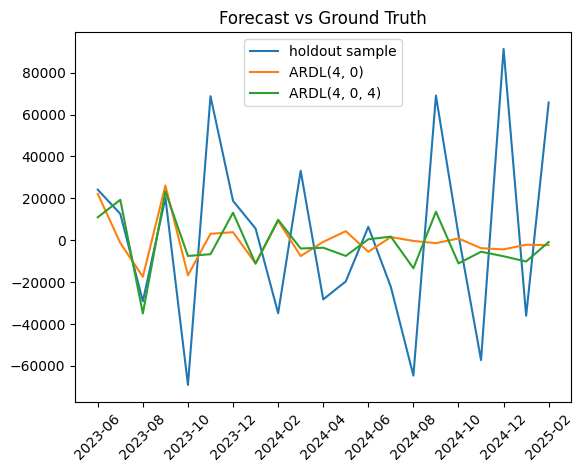

In [10]:
plt.figure()
plt.plot(timestamps[101:], val_data['trade_diff'], label = 'holdout sample')
plt.plot(timestamps[101:], opt_model_forecast, label = 'ARDL(4, 0)')
plt.plot(timestamps[101:], model_4_0_4_forecast, label = 'ARDL(4, 0, 4)')
plt.legend()
plt.xticks(
    ticks=range(0, len(timestamps[101:]), 2),
    rotation=45  
)
plt.title('Forecast vs Ground Truth')